In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

In [2]:
# Загружаем данные
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Разделяем на признаки и метки
X = train_data.drop('label', axis=1).values
y = train_data['label'].values
X_test = test_data.values

# Нормализуем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

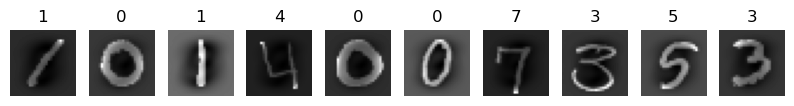

In [3]:
# Функция для отображения цифр
def show_digits(images, labels, n=10):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(str(labels[i]))
        plt.axis('off')
    plt.show()

# Показываем первые 10 цифр
show_digits(X, y)

In [4]:
# Функция для извлечения HOG признаков
def extract_hog_features(images):
    features = []
    for img in images:
        img_reshaped = img.reshape((28, 28))
        fd = hog(img_reshaped, orientations=8, pixels_per_cell=(7, 7), 
                cells_per_block=(1, 1), visualize=False)
        features.append(fd)
    return np.array(features)

# Извлекаем признаки для обучающей и тестовой выборки
X_hog = extract_hog_features(X)
X_test_hog = extract_hog_features(X_test)

In [5]:
# Применяем PCA
pca = PCA(n_components=0.95)  # Сохраняем 95% дисперсии
X_pca = pca.fit_transform(X_hog)
X_test_pca = pca.transform(X_test_hog)

print(f"Исходная размерность: {X_hog.shape[1]}")
print(f"Размерность после PCA: {X_pca.shape[1]}")

Исходная размерность: 128
Размерность после PCA: 88


In [6]:
# Разделяем данные на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Обучаем модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оцениваем на валидационной выборке
y_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy на валидационной выборке: {val_accuracy:.4f}")

Accuracy на валидационной выборке: 0.9186


In [7]:
# Предсказание на тестовых данных
test_pred = model.predict(X_test_pca)

# Сохраняем результаты для Kaggle
output = pd.DataFrame({'ImageId': range(1, len(test_pred)+1), 'Label': test_pred})
output.to_csv('submission.csv', index=False)
print("Файл submission.csv сохранен")

Файл submission.csv сохранен
